In [ ]:
#최지웅 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
data= pd.read_csv("telco.csv")

In [3]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,3323,3324,3325,3326,3327,3328,3329,3330,3331,3332
Leave,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
MemberWeeks,128.00,107.00,137.00,84.0,75.00,118.00,121.00,147.00,117.00,141.00,...,117.00,159.00,78.00,96.00,79.00,192.00,68.00,28.00,184.00,74.0
NewContract,1.00,1.00,1.00,0.0,0.00,0.00,1.00,0.00,1.00,0.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.0
IsData,1.00,1.00,0.00,0.0,0.00,0.00,1.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.0
DataAmount,2.70,3.70,0.00,0.0,0.00,0.00,2.03,0.00,0.19,3.02,...,0.39,0.00,0.23,0.36,0.00,2.67,0.34,0.00,0.00,3.7
Callcenter,1.00,1.00,0.00,2.0,3.00,0.00,3.00,0.00,1.00,0.00,...,5.00,1.00,2.00,1.00,2.00,2.00,3.00,2.00,2.00,0.0
CalMins,265.10,161.60,243.40,299.4,166.70,223.40,218.20,157.00,184.50,258.60,...,118.40,169.80,193.40,106.60,134.70,156.20,231.10,180.80,213.80,234.4
CalCounts,110.00,123.00,114.00,71.0,113.00,98.00,88.00,79.00,97.00,84.00,...,126.00,114.00,99.00,128.00,98.00,77.00,57.00,109.00,105.00,113.0
MonthlyFee,89.00,82.00,52.00,57.0,41.00,57.00,87.30,36.00,63.90,93.20,...,45.90,46.00,45.30,46.60,40.00,71.70,56.40,56.00,50.00,100.0
OverFee,9.87,9.78,6.06,3.1,7.42,11.03,17.43,5.16,17.58,11.10,...,12.47,9.89,5.85,14.24,9.49,10.78,7.67,14.44,7.98,13.3


In [4]:
data['Leave'].value_counts()
#가입한고객들의 평균 가입 기간.
data_range=data[data['Leave']==0]
data_range['MemberWeeks'].describe()


count    2850.000000
mean      100.793684
std        39.882350
min         1.000000
25%        73.000000
50%       100.000000
75%       127.000000
max       243.000000
Name: MemberWeeks, dtype: float64

In [5]:
ex=[]
dr=data_range[data_range['MemberWeeks']==0]
for i in range(0,17):
    ex.append(len(data_range[(data_range['MemberWeeks']>0+(15*i))&(data_range['MemberWeeks']<15+(15*i))]))
ex


[39, 60, 121, 188, 300, 347, 385, 358, 321, 239, 140, 74, 47, 15, 6, 1, 1]

In [6]:
list17=[]
for i in range(0,17):
    list17.append(0+(15*i))
list17_2=[]
for i in range(0,17):
    list17_2.append([(0+(15*i),15+(15*i))])
list17_2

[[(0, 15)],
 [(15, 30)],
 [(30, 45)],
 [(45, 60)],
 [(60, 75)],
 [(75, 90)],
 [(90, 105)],
 [(105, 120)],
 [(120, 135)],
 [(135, 150)],
 [(150, 165)],
 [(165, 180)],
 [(180, 195)],
 [(195, 210)],
 [(210, 225)],
 [(225, 240)],
 [(240, 255)]]

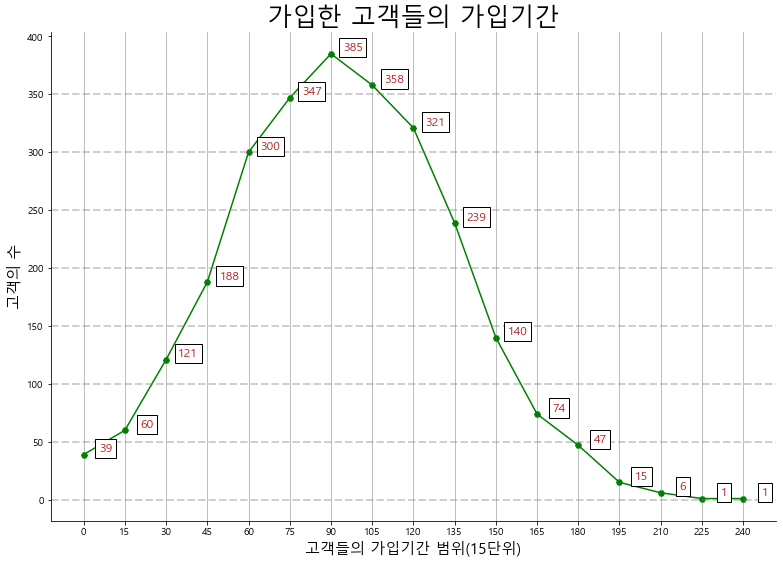

In [7]:
fig = plt.figure(figsize=(13,9))
fig.set_facecolor('white')
ax1 = fig.add_subplot()
ax1.plot(list17, ex,marker="H", color='green')
plt.xlabel('고객들의 가입기간 범위(15단위)',fontsize=15)
plt.ylabel('고객의 수',fontsize=15)
plt.title('가입한 고객들의 가입기간',fontsize=25)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
bbox = dict(
    boxstyle='square',
    facecolor='white',
)
plt.xticks(list17)
for i, v in enumerate(list17):         #그래프 값에 숫자 추가하는 과정
    ax1.text(v+8, ex[i], ex[i],
            fontsize = 9, 
            color='firebrick',
            size=12,
            horizontalalignment='center',
            verticalalignment='bottom',
           bbox=bbox)
for y in range(0,400,50):
    ax1.axhline(y,linestyle=(0,(5,2)),color='grey',alpha=0.5)
ax1.xaxis.grid(True)
plt.show()

In [8]:
#가입한 고객들을 15단위로 나누고 기간에 맞는 고객의 수를 그래프로 표현하였습니다.

In [9]:
leave_data_range=data[data['Leave']==1]
leave_data_range['MemberWeeks'].describe()


count    483.000000
mean     102.664596
std       39.467820
min        1.000000
25%       76.000000
50%      103.000000
75%      127.000000
max      225.000000
Name: MemberWeeks, dtype: float64

In [10]:
lex=[]
list15=[]
for i in range(0,15):
    lex.append(len(leave_data_range[(leave_data_range['MemberWeeks']>0+(15*i))&(leave_data_range['MemberWeeks']<15+(15*i))]))
    list15.append(0+(15*i))
list15
lex


[4, 14, 17, 27, 46, 57, 71, 71, 59, 34, 24, 16, 6, 4, 2]

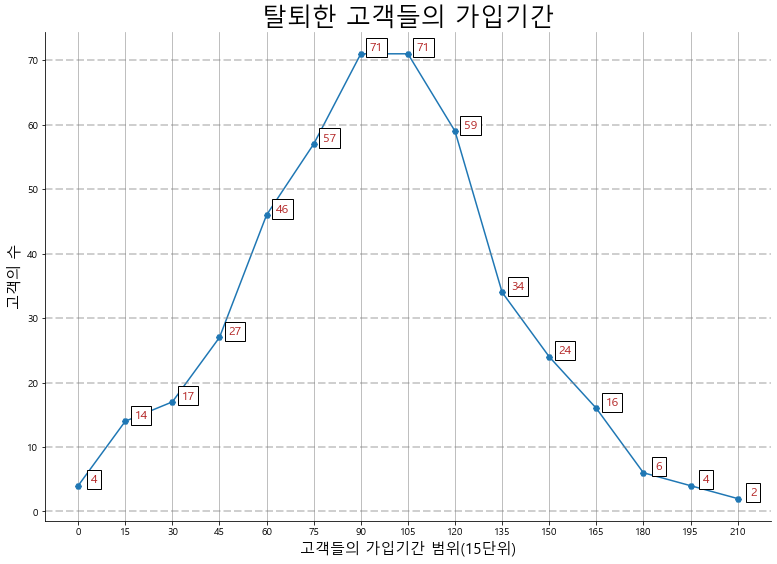

In [11]:
fig = plt.figure(figsize=(13,9)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
ax.plot(list15, lex,marker="H")
plt.xlabel('고객들의 가입기간 범위(15단위)',fontsize=15)
plt.ylabel('고객의 수',fontsize=15)
plt.title('탈퇴한 고객들의 가입기간',fontsize=25)
ax.spines['right'].set_visible(False) ## 오른쪽 축 숨김
ax.spines['top'].set_visible(False) ## 위쪽 축 숨김
bbox = dict( ## 텍스트 박스 스타일 지정
    boxstyle='square', # 박스 모양
    facecolor='white', # 박스 배경색
)

plt.xticks(list15)
for i, v in enumerate(list15):   #그래프 값에 숫자 추가하는 과정
    ax.text(v+5, lex[i], lex[i],
            fontsize = 9,
            color='firebrick',
            size=12,
            horizontalalignment='center',
            verticalalignment='bottom',
            bbox=bbox)
for y in range(0,80,10):
    ax.axhline(y,linestyle=(0,(5,2)),color='grey',alpha=0.5) ## 눈금선 생성
ax.xaxis.grid(True)
plt.show()

In [12]:
#탈퇴한 고객들을 15단위로 나누고 기간에 맞는 고객의 수를 그래프로 표현하였습니다.

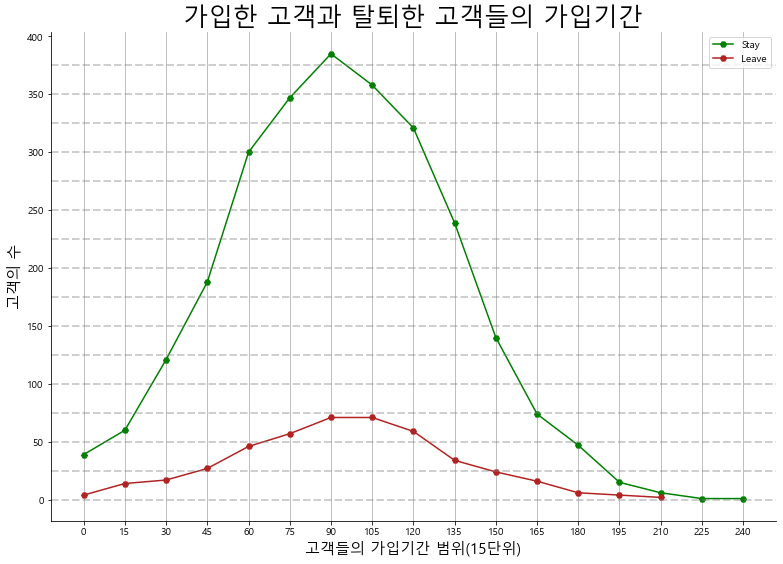

In [13]:
fig = plt.figure(figsize=(13,9)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
plt.plot(list17, ex,marker="H", color='green',label="Stay")
plt.plot(list15, lex,marker="H",color='firebrick',label='Leave')
plt.xlabel('고객들의 가입기간 범위(15단위)',fontsize=15)
plt.ylabel('고객의 수',fontsize=15)
plt.title('가입한 고객과 탈퇴한 고객들의 가입기간',fontsize=25)
ax.spines['right'].set_visible(False) ## 오른쪽 축 숨김
ax.spines['top'].set_visible(False) ## 위쪽 축 숨김
plt.xticks(list17)
for y in range(0,400,50):
    ax1.axhline(y,linestyle=(0,(5,2)),color='grey',alpha=0.5)
plt.xlabel('고객들의 가입기간 범위(15단위)',fontsize=15)
plt.ylabel('고객의 수',fontsize=15)
for y in range(0,400,25):
    ax.axhline(y,linestyle=(0,(5,2)),color='grey',alpha=0.5) ## 눈금선 생성
ax.xaxis.grid(True)
plt.xticks(list17)
ax.legend()
plt.show()

In [14]:
#각각 
#두 그래프를 보면 90~105이상의 고객들부터 고객의 수가 줄어드는 모습을 볼 수 있습니다. 이는 장기 고객을 위한 것이 없어보이고
# 저 기점주터 급격하게 줄어드는 모습을 볼 수 있습니다.
#또 신규 가입자수가 60~90사이 고객들은 높은데 ~60인 고객들은 급격하게 줄 고 있습니다. 또 탈퇴하는 고객들을 보면 초반에 탈퇴하는 비중이 높은것 같습니다.

In [15]:
data['NewContract'].value_counts()
#요금제를 바꾼 고객들의 초과요금

1    3010
0     323
Name: NewContract, dtype: int64

In [16]:
ch_fee=data[(data['NewContract']==1)]
ch_fee['OverFee'].describe()

count    3010.000000
mean       10.035621
std         2.523754
min         0.000000
25%         8.302500
50%        10.070000
75%        11.760000
max        18.090000
Name: OverFee, dtype: float64

In [17]:
ch_fee=data[(data['NewContract']==0)]
ch_fee['OverFee'].describe()

count    323.000000
mean      10.199350
std        2.644023
min        3.040000
25%        8.390000
50%       10.150000
75%       11.970000
max       18.190000
Name: OverFee, dtype: float64

In [18]:
def rating25 (arr):
    return arr.quantile(0.25)
def rating50 (arr):
    return arr.quantile(0.5)
def rating75 (arr):
    return arr.quantile(0.75)
#rating함수는 백분률을 표현하는데 describe에서는 백분율이나오지만 
#여기 agg에서는 없어서 따로 quantile를 이용하여 만든다음에 추가하였습니다.


In [19]:
(   data
    .groupby(['NewContract'])
    .agg({'OverFee':['mean','min',rating25,rating75,'max']})
)
#요금제를 바꾼사람들중 추가요금이 발생하는 추이를 확인하려고 하였습니다
#실질적으로 요금제를 바꾼다고 추가요금이 발생하지 않고, 추가요금이 바꾸지않은사람과 바꾼사람간 차이가 크지않은걸 보아 조금 더 자세한 데이터가 필요 해 보입니다.
#

OverFee                               
                  mean   min rating25 rating75    max
NewContract                                          
0            10.199350  3.04   8.3900    11.97  18.19
1            10.035621  0.00   8.3025    11.76  18.09

In [20]:
data['IsData'].value_counts()
#데이터 요금제에 따른 고객의 전화랑 전화수 요금 초과요금 조회, 로밍시간도 조회

0    2411
1     922
Name: IsData, dtype: int64

In [21]:

(   data
    .groupby(['IsData'])
    .agg({'DataAmount':['mean','min',rating25,rating75,'max'],
           'CalMins':['mean','min',rating25,rating75,'max'],
           'CalCounts': ['mean','min',rating25,rating75,'max'],
         
         }
        )
)

DataAmount                                  CalMins                \
             mean  min rating25 rating75   max        mean  min rating25   
IsData                                                                     
0        0.072086  0.0     0.00     0.00  0.51  179.831813  0.0    143.7   
1        2.763026  0.0     2.27     3.27  5.40  179.626790  2.6    143.5   

                         CalCounts                             
       rating75    max        mean min rating25 rating75  max  
IsData                                                         
0        216.45  350.8  100.573206   0       87      114  165  
1        216.30  322.4  100.075922  35       87      113  163

In [22]:
(
    data
    .groupby(['IsData'])
    .agg({'MonthlyFee': ['mean','min',rating25,rating75,'max'],
          'OverFee' :['mean','min',rating25,rating75,'max'],
         'RoamingMin':['mean','min',rating25,rating75,'max']})
)

MonthlyFee                                  OverFee                 \
             mean   min rating25 rating75    max      mean   min rating25   
IsData                                                                      
0       48.815015  14.0     42.0     56.0   84.0  10.01774  0.00   8.3000   
1       75.891649  26.0     67.4     84.3  111.3  10.13974  2.11   8.3625   

                       RoamingMin                               
       rating75    max       mean  min rating25 rating75   max  
IsData                                                          
0         11.71  18.19  10.239569  0.0      8.5     12.1  18.9  
1         11.83  18.09  10.231345  0.0      8.4     12.1  20.0

In [23]:
#두개로 나눈것은 길어서 생략이 되어 나눠서 표현했습니다
#지금 데이터요금을 사용하는 사람과 데이터요금을 사용하는사람들의 데이터 사용량, 월평균전화량, 전화횟수, 월푱균요금, 초과요금, 로밍시간을 비교하였습니다.
#그 결과 데이터 사용하는 요금제를 사용한다고 크게 차이가 나는 부분은 데이터사용여부와, 월평균 요금뿐 이였고, 데이터요금제를 사용한다고 하더라도 통화나 전화횟수 로밍시간, 추가요금에는 큰 차이가 나타나지않는걸 볼 수 있습니다.

<AxesSubplot:>

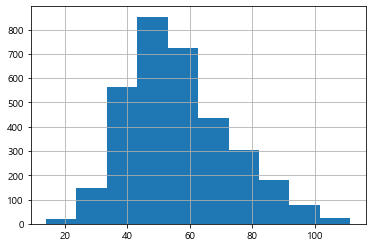

In [24]:
data['MonthlyFee'].hist()

In [25]:
data['MonthlyFee'].describe()

count    3333.000000
mean       56.305161
std        16.426032
min        14.000000
25%        45.000000
50%        53.500000
75%        66.200000
max       111.300000
Name: MonthlyFee, dtype: float64

In [38]:
call=[]
usedata=[]
list5=[]
for i in range(0,11):
    call.append((data[(data['MonthlyFee']>10+(10*i))&(data['MonthlyFee']<30+(10*i))]['CalMins']).mean())
    usedata.append((data[(data['MonthlyFee']>10+(10*i))&(data['MonthlyFee']<30+(10*i))]['DataAmount']).mean())
    list5.append(10+(10*i))
    

In [39]:
call

[68.212,
 110.04144144144145,
 146.52514619883036,
 180.35188106796105,
 202.0034992223948,
 201.87250945775546,
 200.96323809523815,
 216.82730158730166,
 239.52900763358784,
 258.45624999999995,
 268.8]

In [40]:
usedata

[0.04933333333333333,
 0.07087837837837835,
 0.09076023391812864,
 0.17466019417475734,
 0.5831726283048212,
 1.6257881462799515,
 2.6337904761904762,
 3.1061587301587306,
 3.428549618320611,
 3.9262500000000005,
 4.43]

In [41]:
list5

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]

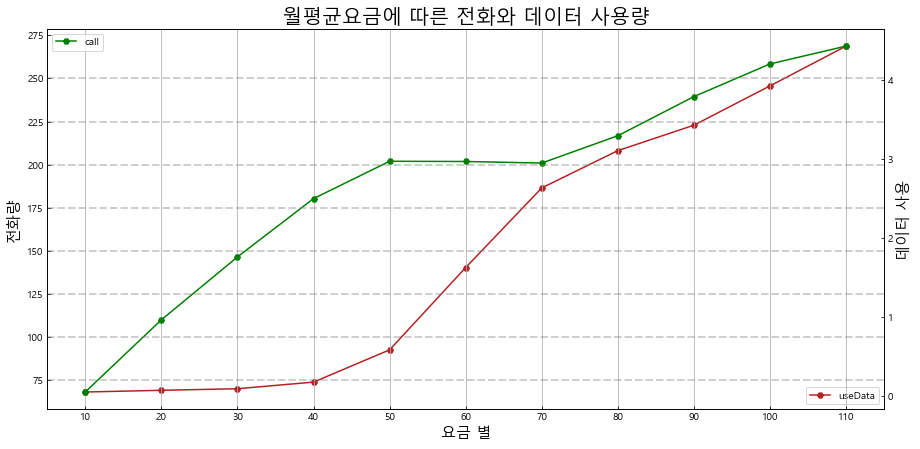

In [42]:
plt.rcParams['figure.figsize'] = [15, 7]
fig, ax1 = plt.subplots()
ax1.plot(list5, call,marker="H", color='green',label="call")
ax1.set_xlabel('요금 별',fontsize=15)
ax1.set_ylabel('전화량',fontsize=15)
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.plot(list5, usedata,marker="H", color='firebrick',label="useData")
# ax2.set_ylim(0,5)
# ax1.set_ylim(0,282,5)
ax2.set_ylabel('데이터 사용',fontsize=15)
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('월평균요금에 따른 전화와 데이터 사용량',fontsize=20)
plt.xticks(list5)
plt.legend(loc="lower right", fontsize=10)
for y in range(75,275,25):
    ax1.axhline(y,linestyle=(0,(5,2)),color='grey',alpha=0.5)
# for y in range(0,5):
#     ax2.axhline(y,color='grey',alpha=0.5,linestyle=(0,(5,2)))
ax1.xaxis.grid(True)
plt.show()

In [43]:
#요금별로 전화량과 데이터 사용량을 그래프화하여 표현 하였고 요금과 데이터사용, 
#전화량은 비례하여 늘어나지만 낮은 요금에서는 데이터사용이 낮다가 60정도 요금제에서 데이터사용이 늘어나기시작하고,70이상의 요금제에서는 데이터사용량이 완만하게 증가합니다
#전화량은 50이상 80미만에서는 통화량이 비슷하고 이외 요금제에서는 증가하는 추세입니다.